# Bank Loan Deafaulter Detection

Columns  	Description

id-- A unique LC assigned ID for the loan listing.

member_id--A unique LC assigned Id for the borrower member.

loan_amnt--The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces             the loan amount, then it will be reflected in this value.

funded_amnt--The total amount committed to that loan at that point in time.

funded_amnt_inv--	The total amount committed by investors for that loan at that point in time.

term--The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate--Interest Rate on the loan

installment--The monthly payment owed by the borrower if the loan originates.

grade--LC assigned loan grade

sub_grade--LC assigned loan subgrade

emp_length--Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

home_ownership--The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

annual_inc-- The self-reported annual income provided by the borrower during registration.

verification_status--	Indicates if income was verified by LC, not verified, or if the income source was verified

issue_d--	The month which the loan was funded

loan_status--	Current status of the loan

dti--	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

delinq_2yrs--	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

earliest_cr_line--	The month the borrower's earliest reported credit line was opened

inq_last_6mths--	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

mths_since_last_delinq--The number of months since the borrower's last delinquency.

mths_since_last_record--	The number of months since the last public record.

open_acc--	The number of open credit lines in the borrower's credit file.

pub_rec--	Number of derogatory public records

revol_bal--	Total credit revolving balance

revol_util--	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc--	The total number of credit lines currently in the borrower's credit file

out_prncp--	Remaining outstanding principal for total amount funded

out_prncp_inv--	Remaining outstanding principal for portion of total amount funded by investors

total_pymnt--	Payments received to date for total amount funded

total_pymnt_inv--	Payments received to date for portion of total amount funded by investors

total_rec_prncp--	Principal received to date

total_rec_int--	Interest received to date

total_rec_late_fee--	Late fees received to date

recoveries--	post charge off gross recovery

collection_recovery_fee--	post charge off collection fee

last_pymnt_d--Last month payment was received

last_pymnt_amnt--	Last total payment amount received

next_pymnt_d--	Next scheduled payment date

last_credit_pull_d--	The most recent month LC pulled credit for this loan

pub_rec_bankruptcies--	Number of public record bankruptcies


### Business Problem:- To dect the the Loan Defaulter

Lets start with importing the necessary libraries

In [1]:
import pandas as pd     #data processing
import numpy as np      #Linear Algebra      
import matplotlib.pyplot as plt #Data visualization
%matplotlib inline
import seaborn as sns
colour=sns.color_palette()

In [2]:
df=pd.read_excel('D:\\Datascience\\bank loan risk- aap\\loan.xlsx')

In [3]:
print(df.shape)

(39717, 41)


In [4]:
pd.set_option('display.max_columns',50)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,0.985,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,0.210,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,17.94,0,1996-01-01,0,38.0,NaN,15,0,27783,0.539,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-06-01,2016-05-01,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
e

In [6]:
df['loan_status'].unique()      # this is the target variable with three levels

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0000,516221.0000,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.0000,666780.0000,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.0000,5500.0000,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.0000,5400.0000,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0000,5000.0000,8975.000000,1.440000e+04,3.500000e+04
int_rate,39717.0,0.120212,0.037248,0.0542,0.0925,0.118600,1.459000e-01,2.459000e-01
installment,39717.0,324.561922,208.874874,15.6900,167.0200,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.0000,40404.0000,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.0000,8.1700,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.0000,0.0000,0.000000,0.000000e+00,1.100000e+01


from the above description we can see that the anual_income, inq_last_6mths, total_acc, out_prncp, out_prncp_inv, total_rec_late_fee, recoveries, collection_recovery_fee. shows some outlier, we cannot conclude anything now. furthe data understanding and analysis to required to conclude anything

In [8]:
df.isnull().sum()      # Lets check for any null values

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymn

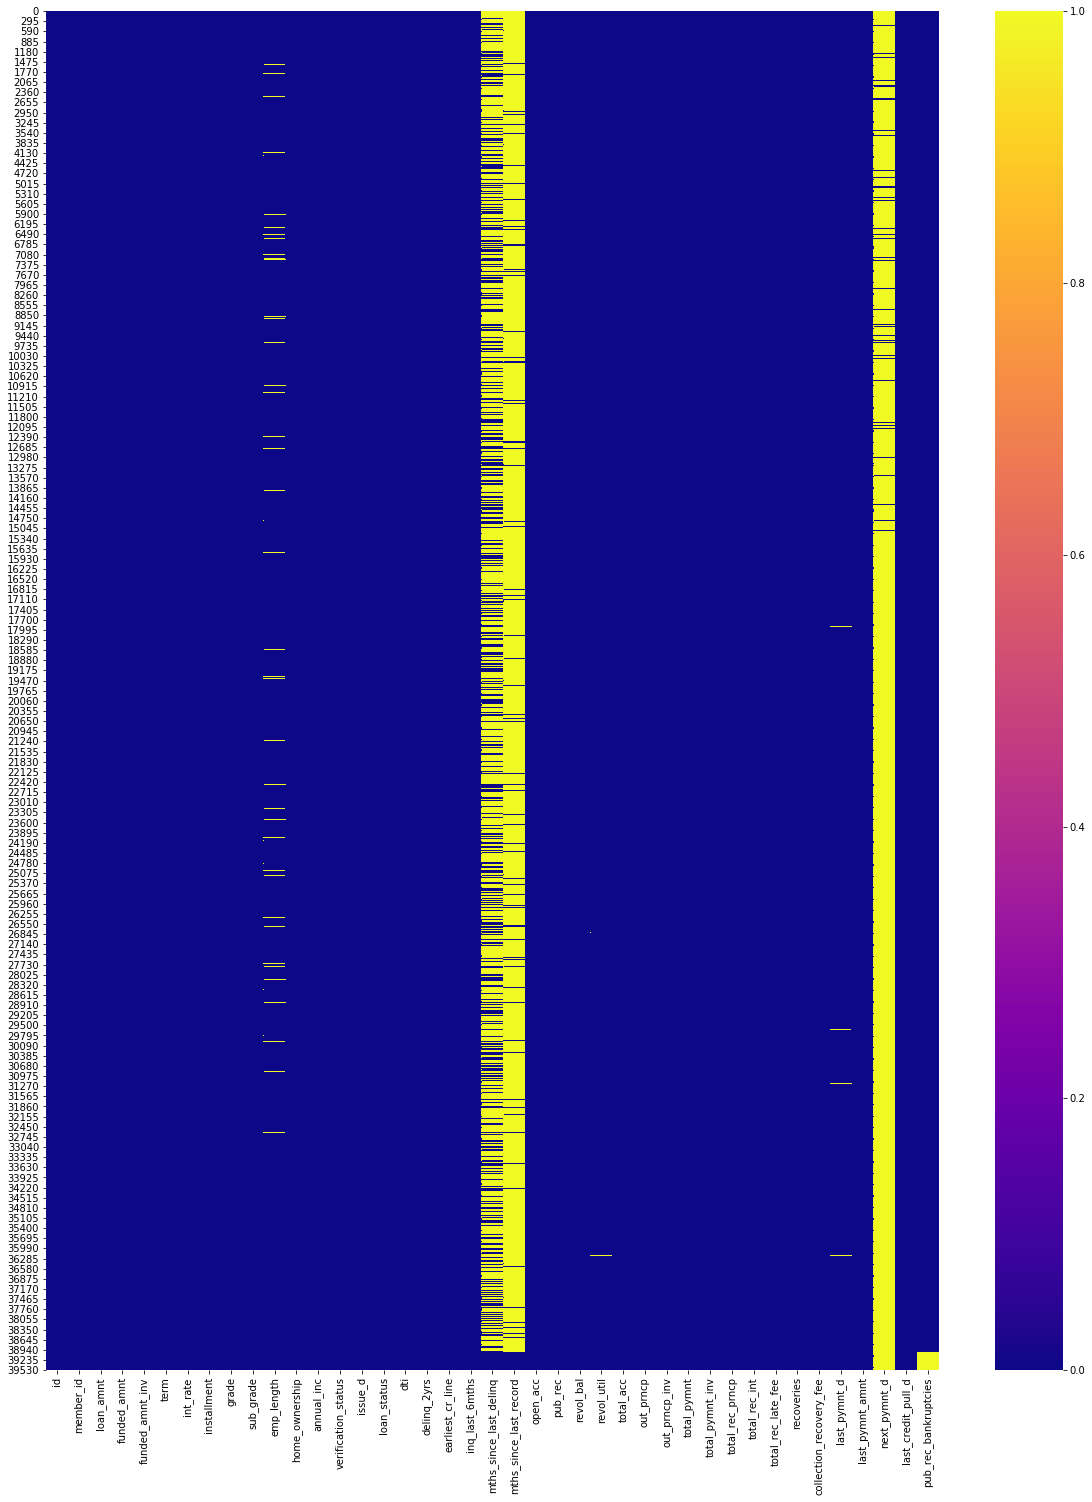

In [9]:
plt.figure(figsize=(20,25))
sns.heatmap(df.isnull(),xticklabels=df.columns, cmap='plasma')
plt.show()

In [10]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymn

from the above heat map we can visualy see that the varibale like 'mths_since_last_record' and 'next_payment_d' has lots of missing datas. lets analyze the same mathematically

lets calculate the null values in terms of %, and store it in the tabular format

In [11]:
columns=[]
null_values=[]
percentage=[]
for col in df.columns:
    if df[col].isnull().sum()!=0:
        null=df[col].isnull().sum()
        null_values.append(null)
        percent=np.round((null/df[col].isnull().count())*100,2)
        percentage.append(percent)
        columns.append(col)    

In [12]:
summary=pd.DataFrame({'columns':columns, 'null_values':null_values, '%': percentage})

In [13]:
summary.sort_values(by='%', ascending=False)

,columns,null_values,%
5,next_pymnt_d,38577,97.13
2,mths_since_last_record,36931,92.99
1,mths_since_last_delinq,25682,64.66
0,emp_length,1075,2.71
7,pub_rec_bankruptcies,697,1.75
4,last_pymnt_d,71,0.18
3,revol_util,50,0.13
6,last_credit_pull_d,2,0.01


from the above table we can see that variables 'mths_since_last_delinq', 'mths_since_last_record' and 'next_pymnt_d' have 64.66%. 93% and 97% of missing data respectively. we drop these variable

In [14]:
df=df.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis=1)


In [15]:
df.shape

(39717, 38)

lets fill in the missing values for the remaning variable

In [16]:
for col in df.select_dtypes(('int64', 'float64')):
    if df[col].isnull().sum()!=0:
        df[col]=df[col].fillna(df[col].mean())


In [17]:
for col in df.select_dtypes('object'):
    if df[col].isnull().sum()!=0:
        df[col]=df[col].fillna(df[col].value_counts().index[0])


OUT- Lier Analysis

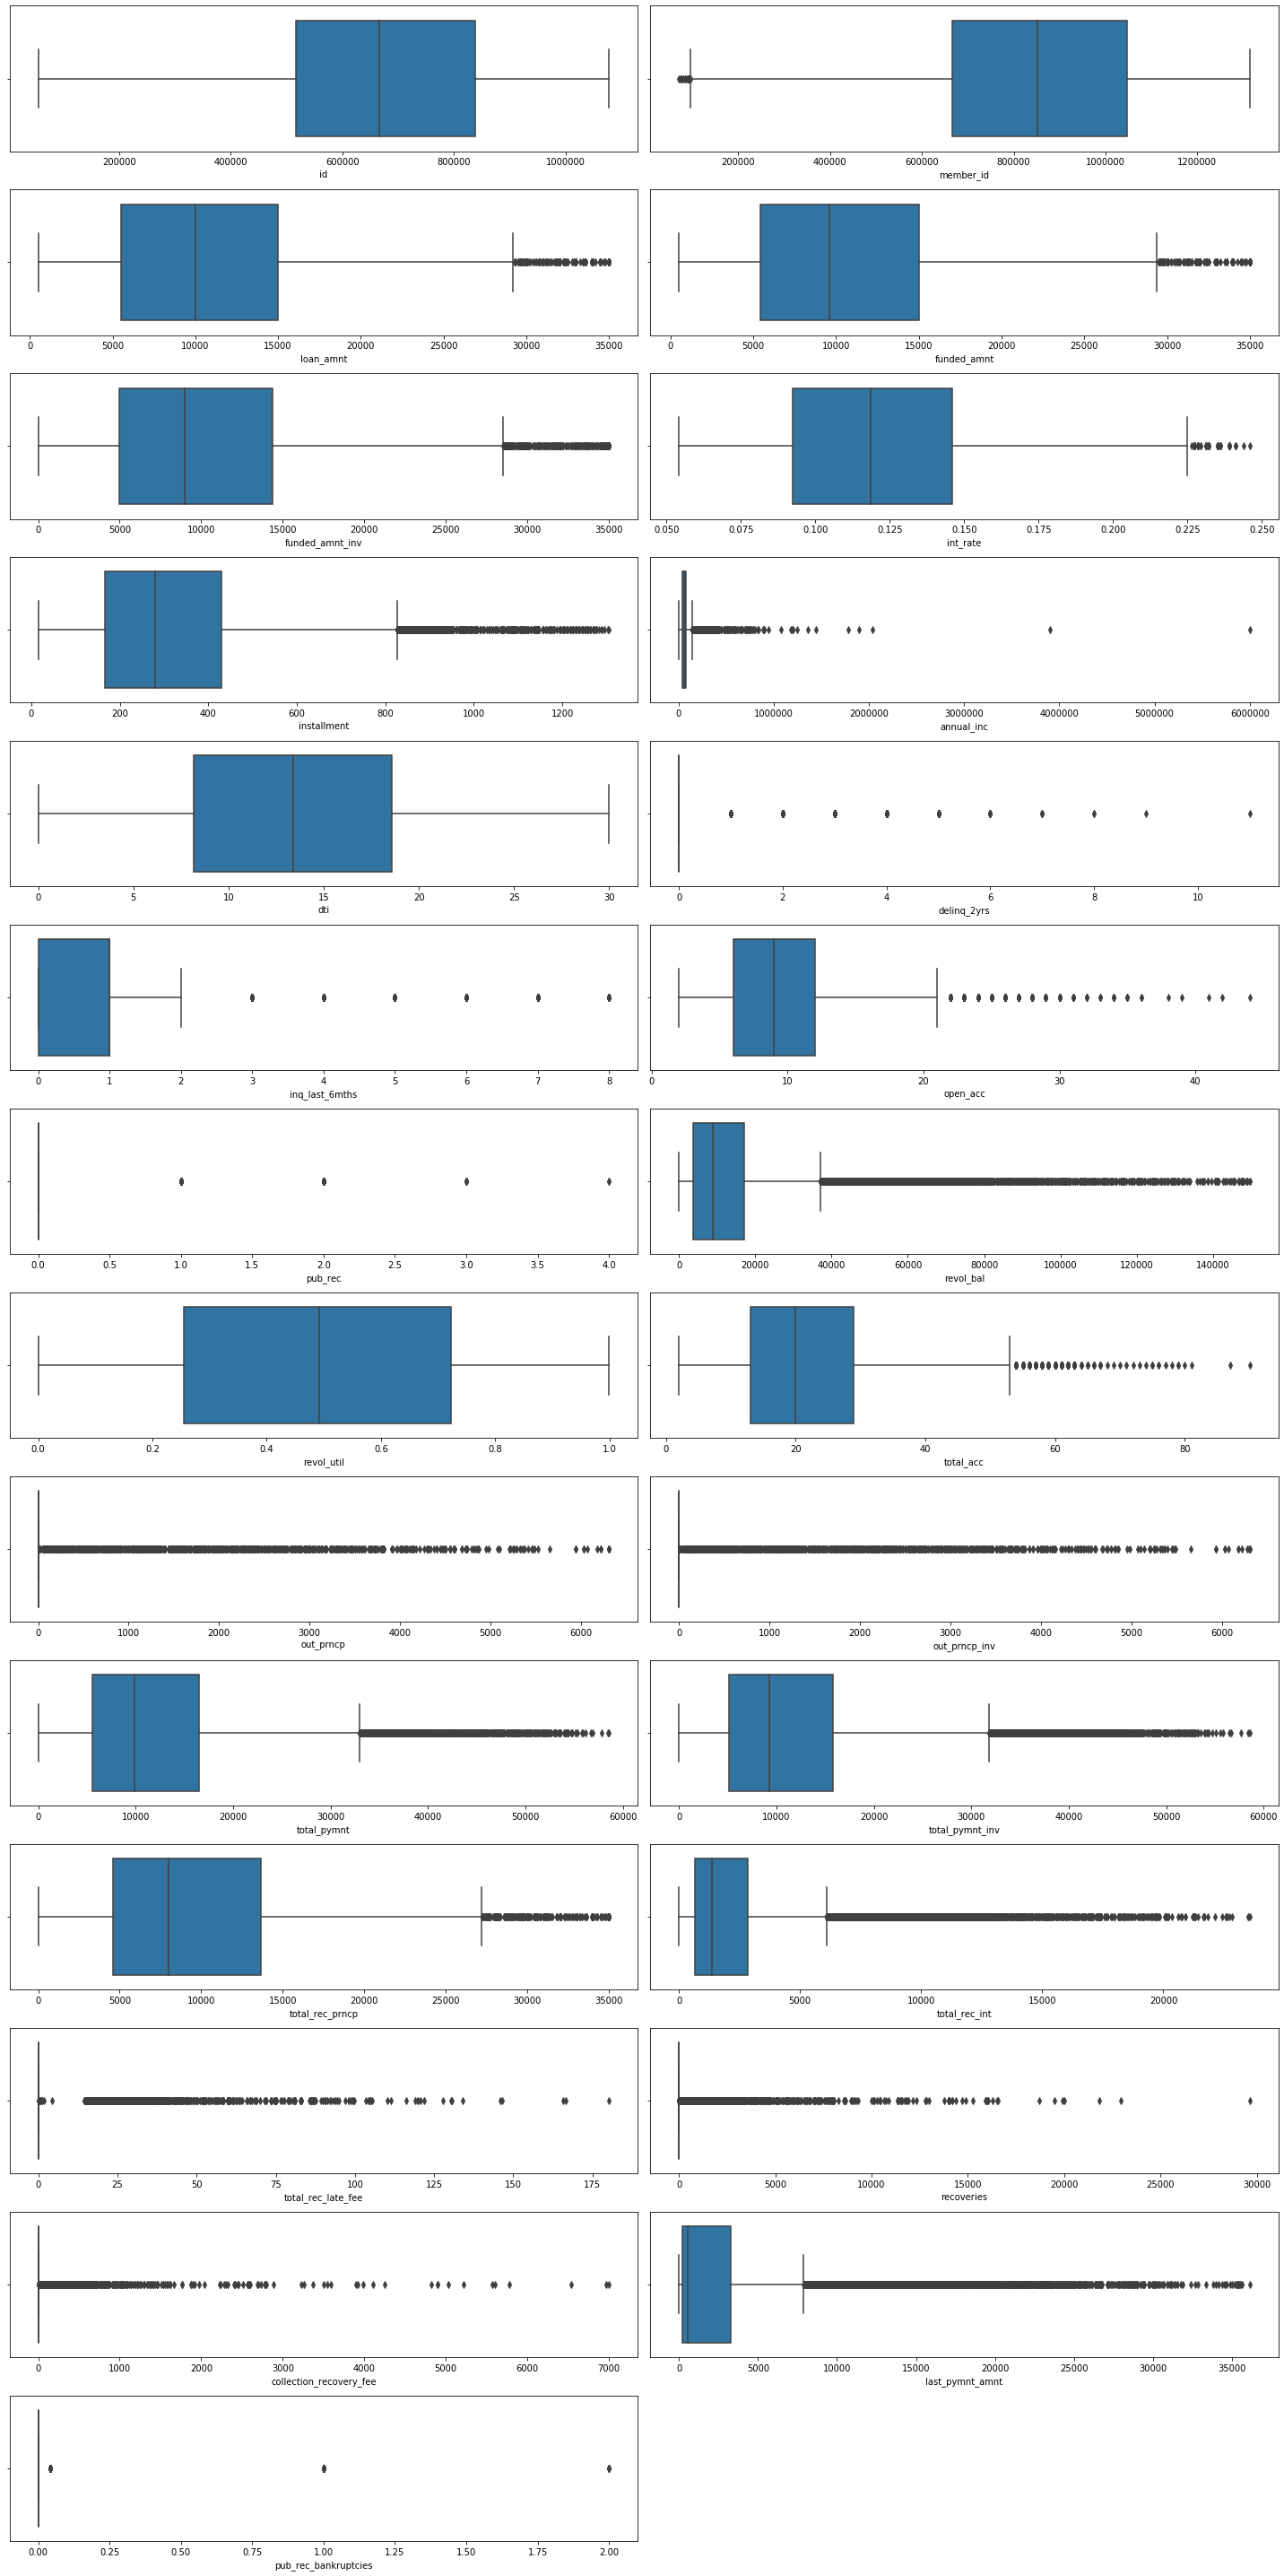

In [18]:
plt.figure(figsize=(20,40))
num_col=[]
n=1
for col in df.select_dtypes(('int64', 'float64')):
    plt.subplot(14,2,n)
    sns.boxplot(df[col])
    plt.tight_layout()
    n=n+1
plt.show()

We notice that most of our data is positively sckewed. We cannot removed the outliers on theoritical basis and risk loosing importing information. We will come back to this section if we dont get the desired accuracy while modelling

there are two types of grading system. one grade and the other is sub-grade, sub grade is nothing but a further categorization of the Grade. lets see how many levels does these two variable have and based on that we might wanna drop one pf the variable 

In [19]:
(df['annual_inc'].values>200000).sum()

586

In [20]:
df['grade'].nunique()

7

In [21]:
df['sub_grade'].nunique()

35

Since Sub grade had too many levels. its better we choose grade variable ove sub_grade because the grade varibale gives enough explaination with limited level

We can also say the member if and id doesnt play any significant role while decided a person will be a defaulter or no. So it is better we drop these two variables as well.

In [22]:
df=df.drop(['sub_grade','id', 'member_id'], axis=1)

lets use foward fill method to handle missing value in 'last_payment_d' variable

In [23]:
df['last_pymnt_d']=df['last_pymnt_d'].ffill()

In [24]:
df['last_credit_pull_d']=df['last_credit_pull_d'].ffill()

Lets change the change the dtype of all the object columns into category 

In [25]:
for col in df.select_dtypes('object'):
    df[col]=df[col].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 35 columns):
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null category
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null category
emp_length                 39717 non-null category
home_ownership             39717 non-null category
annual_inc                 39717 non-null float64
verification_status        39717 non-null category
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null category
dti                        39717 non-null float64
delinq_2yrs                39717 non-null int64
earliest_cr_line           39717 non-null datetime64[ns]
inq_last_6mths             39717 non-null int64
open_acc                   39

### Explaintory Data Analysis

Univariate Analysis- Target variable

In [27]:
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [28]:
size=[df.loan_status[df['loan_status']=='Fully Paid'].count(),df.loan_status[df['loan_status']=='Charged Off'].count(),df.loan_status[df['loan_status']=='Current'].count()]
size

[32950, 5627, 1140]

In [29]:
labels=['Fully paid', 'Charged off', 'Current']

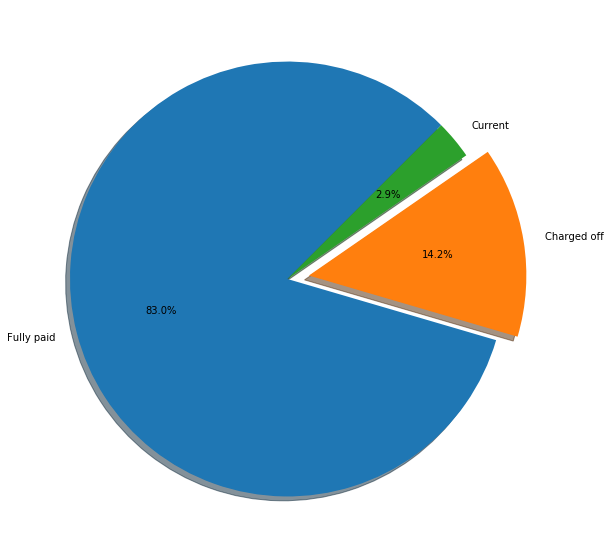

In [30]:
plt.figure(figsize=(10,10))
plt.pie(size, labels=labels, explode=(0,0.1,0), shadow=True, autopct='%1.1f%%', startangle=45)
plt.show()

now we see that 83% fully paid and 2.9% are currently paying thier loan. and 14.2% have charges off with out paying back the bank. 

Univariate Analysis: Categorical columns

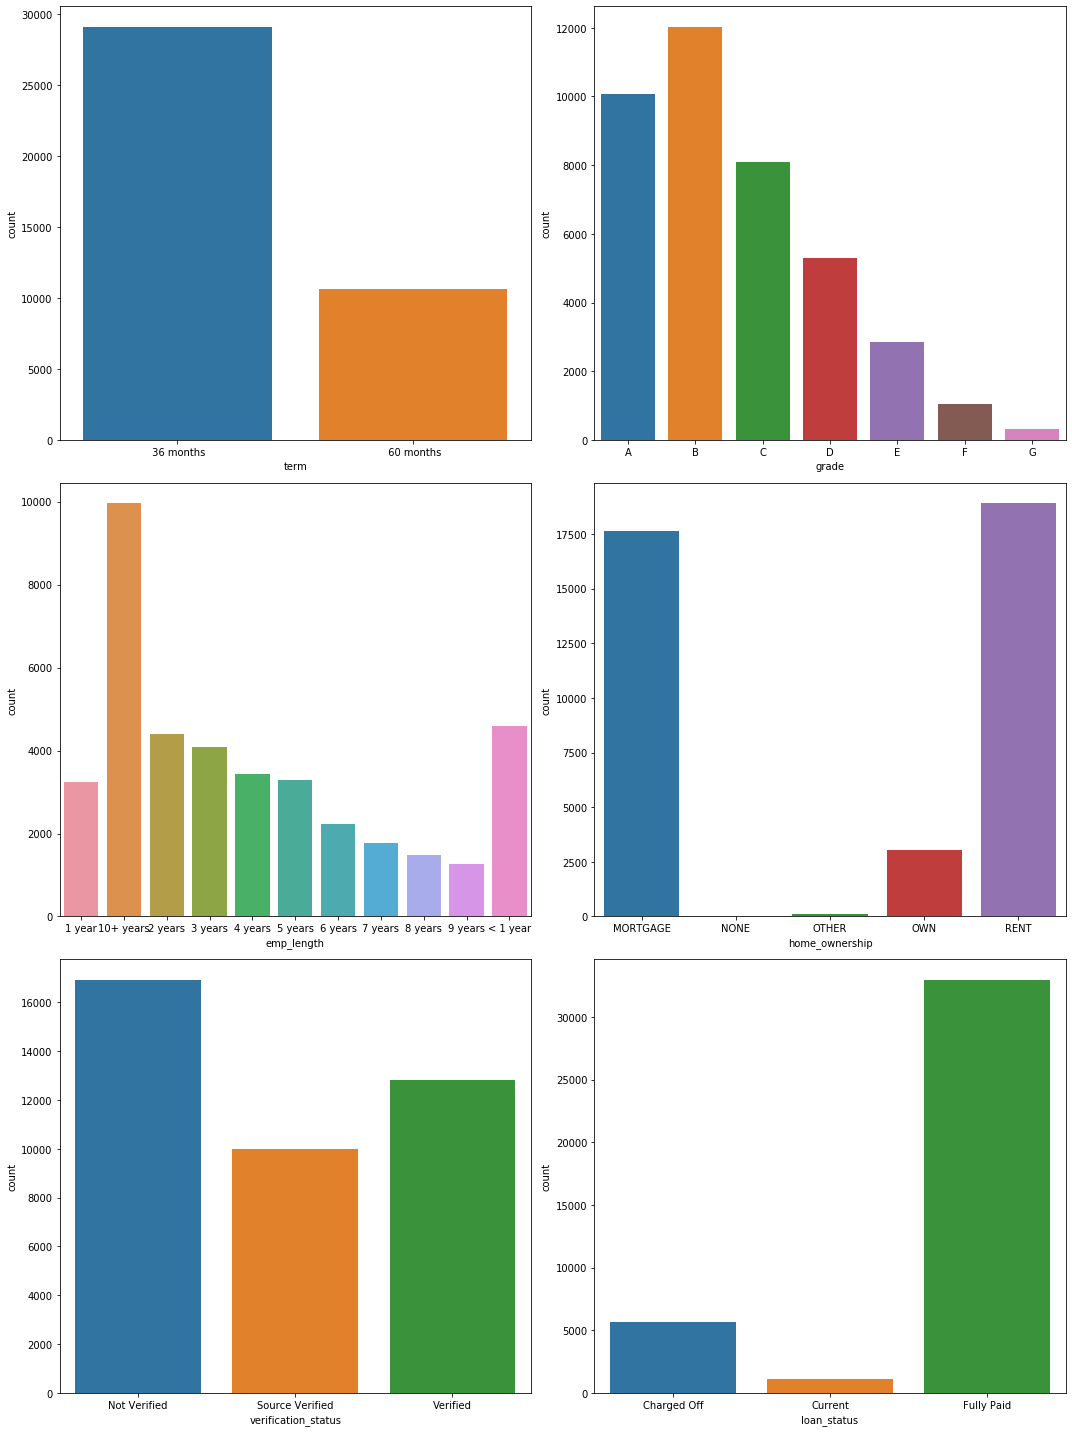

In [31]:
cat_cols=[]
plt.figure(figsize=(15,20))
n=1
for col in df.select_dtypes('category'):
    plt.subplot(3,2,n)
    sns.countplot(x=col, data=df)
    plt.tight_layout()
    n=n+1
    cat_cols.append(col)
plt.show()

from the above graph we can see that maximum no. of people have used the 36 month term.
people who are employed for more than 10 years are more likely to apply for loan.
We also see a maximum no. of people belong to the A, B and C grades

Univariate Analysis- Num columns

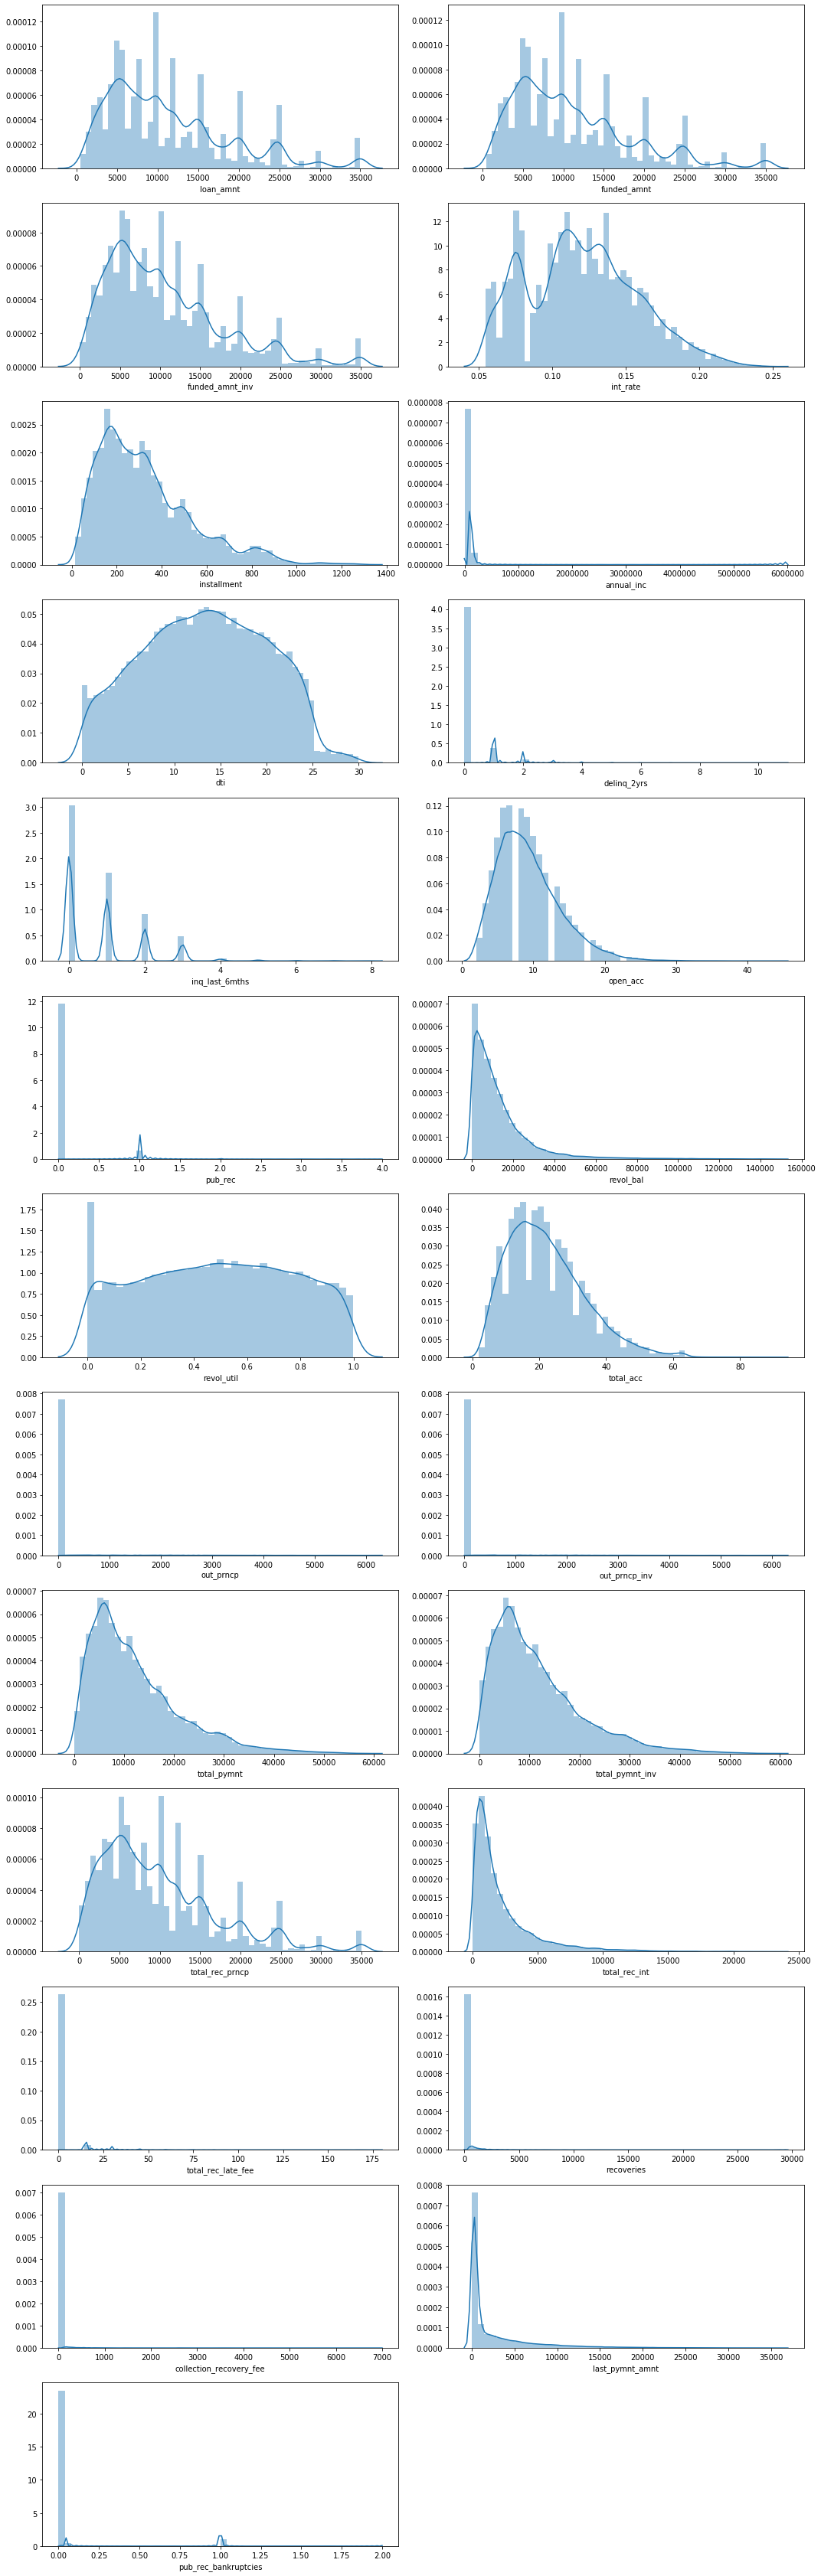

In [32]:
num_cols=[]
plt.figure(figsize=(15,50))
n=1
for col in df.select_dtypes(('float64', 'int64')):
    plt.subplot(14,2,n)
    sns.distplot(df[col])
    plt.tight_layout()
    n=n+1
    num_cols.append(col)
plt.show()
    

We can see that almost all the columns are positively skewed!

We Notice that the variable 'pub_rec_bankruptcies' is suppsoed to int values, not float we first charge the variable to int

In [33]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].astype('int64')

from the above univariate analysis of the numeric columns we see that there are many columns that are actually categorical in nature. so we'll change the dtypes of thos columns in to categorial

In [34]:
cat_num=['delinq_2yrs','inq_last_6mths', 'pub_rec','pub_rec_bankruptcies']

In [35]:
for col in cat_num:
    df[col]=df[col].astype('category')

Correlation check between some independent varibables: In our Univaraite analysis of numeric variables we noticed some variable have same distrubution plot of each other.

In [36]:
funds=num_cols[:3]
correlation=[]
for col in funds:
    corr=df['loan_amnt'].corr(df[col])
    correlation.append(corr)
    

In [37]:
corr_funds=pd.DataFrame({'Columns':funds, 'Corr': correlation})
corr_funds

,Columns,Corr
0,loan_amnt,1.000000
1,funded_amnt,0.981578
2,funded_amnt_inv,0.940034


from the above table we see a lot of correlation between the loan_amnt, funded_amnt, funded_amnt_inv. Its better to consider only the funded_amnt variable for fruther iterations 

In [38]:
df['out_prncp'].corr(df['out_prncp_inv']) 

0.9998274655132868

In [39]:
df['total_pymnt'].corr(df['total_pymnt_inv'])

0.9708145208132953

we see 99.98% of correlation between (out_prncp and out_prncp_inv) and 97.08% correlation between(toal_pymnt and total_pymnt_inv), so its safe to drop one of them in each category

In [40]:
df=df.drop(['loan_amnt','funded_amnt_inv', 'out_prncp_inv','total_pymnt_inv'], axis=1)

Time Series Visualization

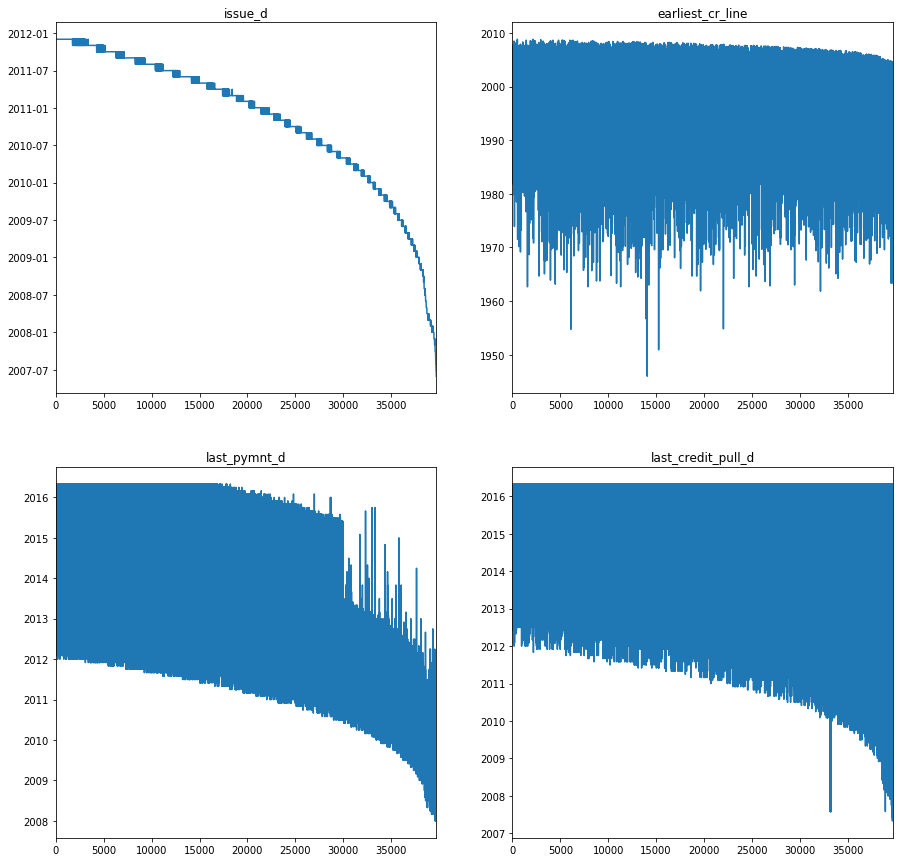

In [41]:
plt.figure(figsize=(15,15))
n=1
for col in df.select_dtypes('datetime64'):
    plt.subplot(2,2,n)
    df[col].plot()
    plt.title(col)
    n=n+1
plt.show()

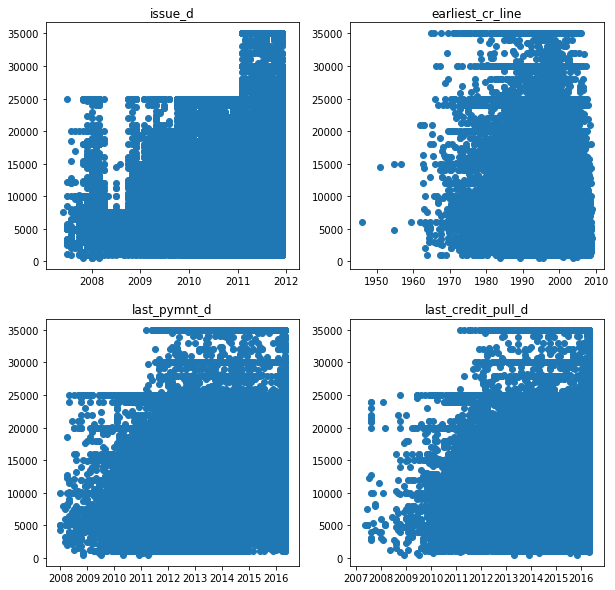

In [42]:
plt.figure(figsize=(10,10))
n=1
for col in df.select_dtypes('datetime64'):
    plt.subplot(2,2,n)
    plt.scatter(df[col], df['funded_amnt'])
    plt.title(col)
    n=n+1
plt.show()

The funded amount has increase between 2011-2012

In [43]:
df.set_index('issue_d', inplace=True)

In [44]:
monthly=df.resample('M').sum()

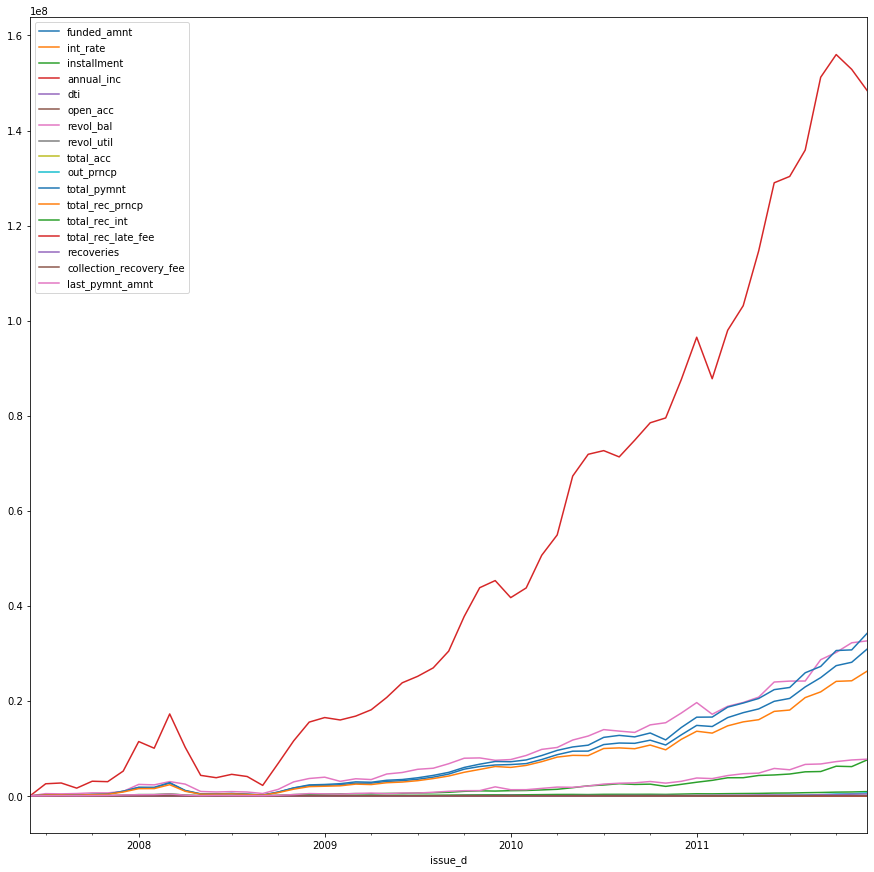

In [45]:
#plt.figure(figsize=(15,15))
monthly.plot(figsize=(15,15))


#### Bi-variate Analysis

In [46]:
term_status=pd.crosstab(df['loan_status'], df['term'], margins=True)     # getting the relation ship between loan status and term
print(term_status)

term          36 months   60 months    All
loan_status                               
Charged Off        3227        2400   5627
Current               0        1140   1140
Fully Paid        25869        7081  32950
All               29096       10621  39717


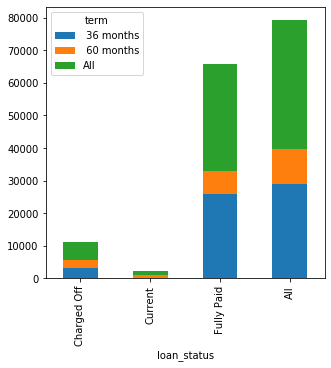

In [47]:
term_status.plot(kind='bar', stacked=True, figsize=(5,5), legend=True)
plt.show()

we notice that people with 60 months term are the only people who are currently paying, otherwise 30 moths are either fully paid or charged off!
after seeing this grap, it would be better id we can visualise this in terms of the loan amount too.

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


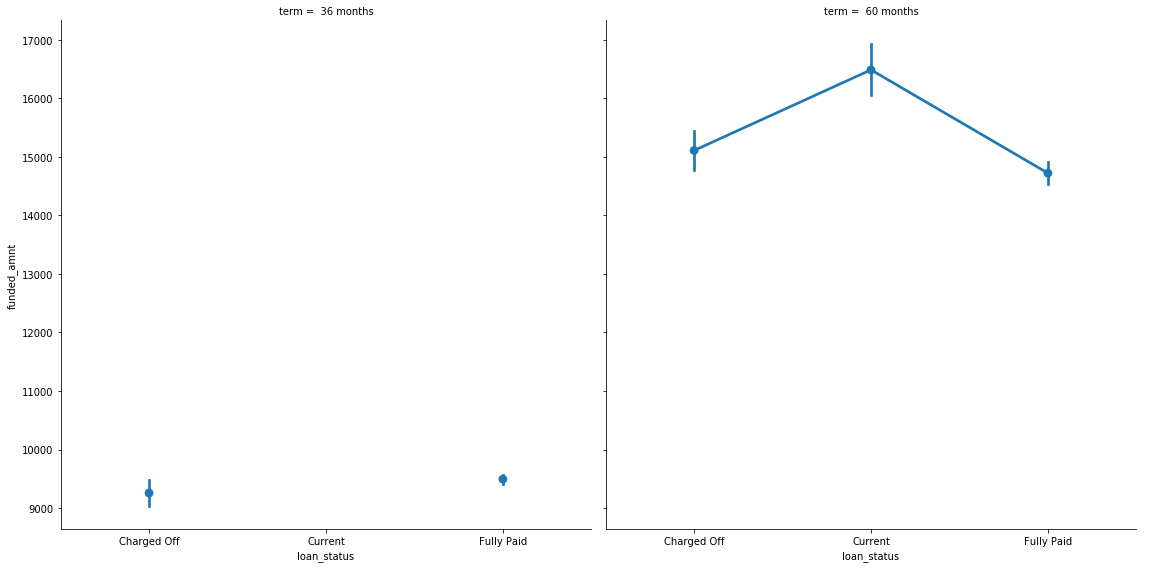

In [48]:
facet_grid=sns.FacetGrid(df, col='term', size=8)
facet_grid.map(sns.pointplot, 'loan_status', 'funded_amnt', palette=None, order=None, hue_order=None)
facet_grid.add_legend()

from the above grap we can clearly see that the higher loan amount  60 months term, and for lower loan amount we get, 36 months term

In [49]:
grade_status=pd.crosstab(df['grade'], df['loan_status'])
grade_status

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,602,40,9443
B,1425,345,10250
C,1347,264,6487
D,1118,222,3967
E,715,179,1948
F,319,73,657
G,101,17,198


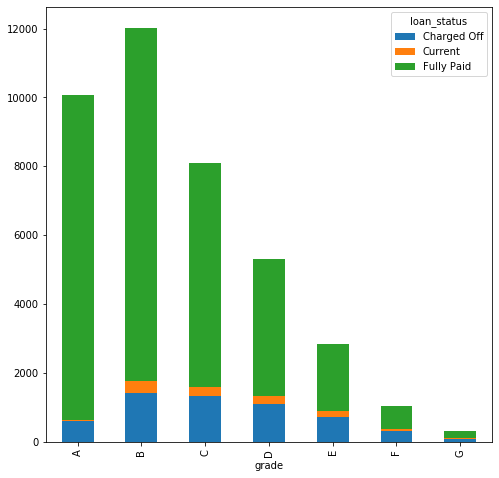

In [50]:
grade_status.plot(kind='bar', stacked=True, figsize=(8,8), legend=True)
plt.show()

from the above graph we can see that customer with grade B anf C are more likely to default, as compare to all other grade.

In [51]:
emp_status=pd.crosstab(df['emp_length'], df['loan_status'])
emp_status

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,456,71,2713
10+ years,1559,433,7962
2 years,567,97,3724
3 years,555,83,3457
4 years,462,94,2880
5 years,458,88,2736
6 years,307,61,1861
7 years,263,62,1448
8 years,203,44,1232


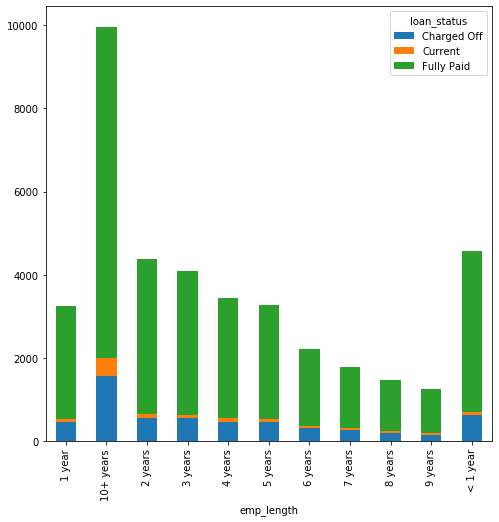

In [52]:
emp_status.plot(kind='bar', stacked=True, figsize=(8,8), legend=True)
plt.show()

people with 10+ years of emp_length are the maximum likely to take a loan.

In [53]:
own_status=pd.crosstab(df['home_ownership'], df['loan_status'])
own_status

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,2327,638,14694
NONE,0,0,3
OTHER,18,0,80
OWN,443,83,2532
RENT,2839,419,15641


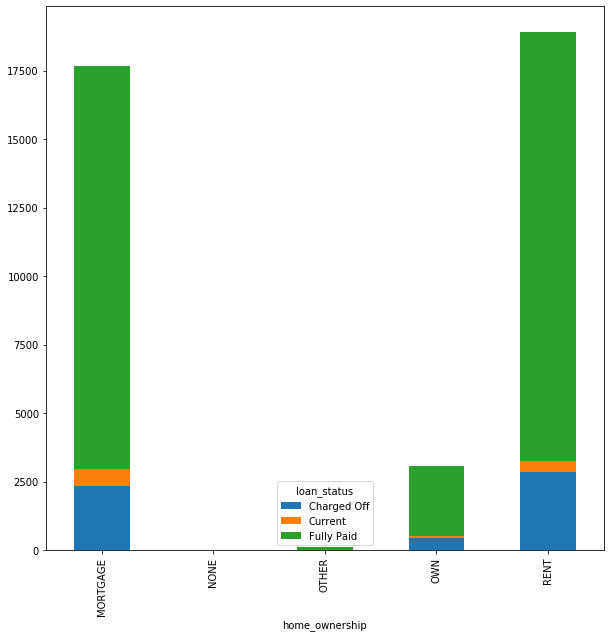

In [54]:
own_status.plot(kind='bar', stacked=True, figsize=(10,10), legend=True)
plt.show()

people in the rented pkace have charged of more than Mortgage and Own, we also notice its very safe to lend a loan to people who own a house. 

its very Evident form the above graph the people with lower annual income has a higher chances for defaulting the payment

In [55]:
veri_status=pd.crosstab(df['verification_status'], df['loan_status'])
veri_status

loan_status,Charged Off,Current,Fully Paid
verification_status,,,
Not Verified,2142,227,14552
Source Verified,1434,310,8243
Verified,2051,603,10155


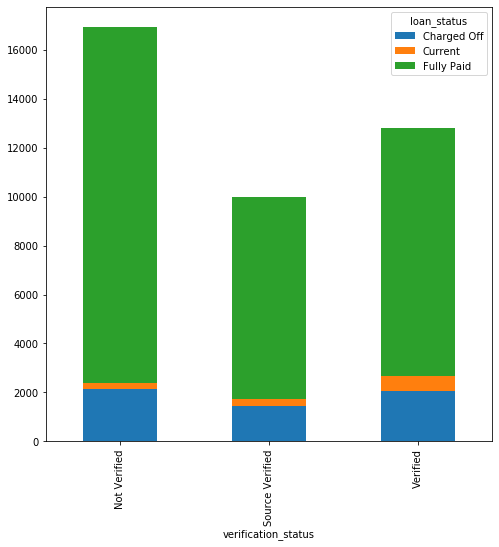

In [56]:
veri_status.plot(kind='bar', stacked=True, legend=True, figsize=(8,8))
plt.show()

we notcie that all three categories have somewhat equal propotion of customers being charged off!

In [57]:
bankrupt_status=pd.crosstab(df['pub_rec_bankruptcies'], df['loan_status'])
bankrupt_status

loan_status,Charged Off,Current,Fully Paid
pub_rec_bankruptcies,,,
0,5259,1101,31676
1,366,37,1271
2,2,2,3


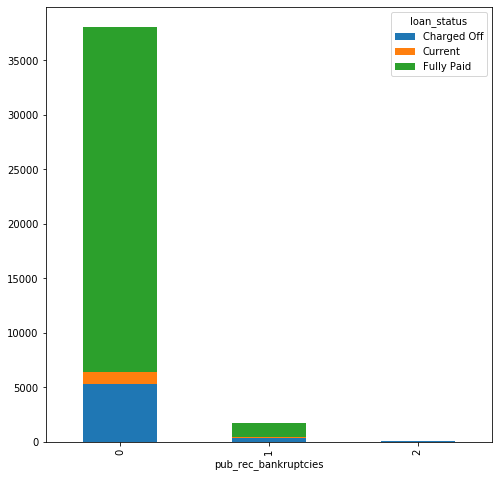

In [58]:
bankrupt_status.plot(kind='bar', stacked=True, legend=True, figsize=(8,8))
plt.show()

We see higher the bankruptcies record higher the chances of chargind off

As it is a classification problem its always better to visualization by converting the numerical feature in to categorical features. so lets start with binning all the numerical features first

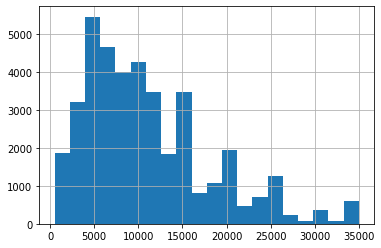

In [59]:
df['funded_amnt'].hist(bins=20)

In [60]:
bins=[0,1000,5000,7000,10000,13000,15000,20000,25000,35000]
labels=[1,2,3,4,5,6,7,8,9]

In [61]:
df['funded_amnt']=pd.cut(df['funded_amnt'], bins=bins, labels=labels)
df['funded_amnt']=df['funded_amnt'].astype('category')

In [62]:
fund_status=pd.crosstab(df['funded_amnt'], df['loan_status'])
fund_status

loan_status,Charged Off,Current,Fully Paid
funded_amnt,,,
1,48,3,263
2,1283,93,7961
3,591,66,4380
4,1073,98,6953
5,611,170,3922
6,481,138,2856
7,778,257,3562
8,490,172,2057
9,272,143,996


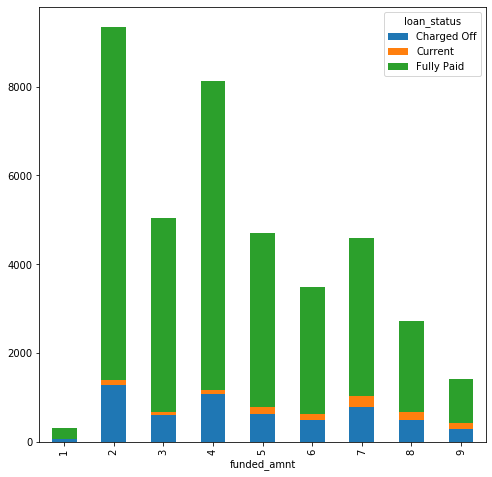

In [63]:
fund_status.plot(kind='bar', stacked=True, legend=True, figsize=(8,8))
plt.show()

we see a equal propotion of people charging off in all categories of funded amount

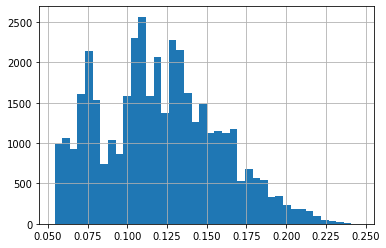

In [64]:
df['int_rate'].hist(bins=40)

In [65]:
bins=[0,0.075,0.1,0.115,0.130,0.150,0.175,0.200,0.250]
labels=[0, 1, 2, 3,4, 5, 6, 7]

In [66]:
df['int_rate']=pd.cut(df['int_rate'], bins=bins, labels=labels)
df['int_rate']=df['int_rate'].astype('category')

In [67]:
rate_status=pd.crosstab(df['int_rate'], df['loan_status'])
rate_status

loan_status,Charged Off,Current,Fully Paid
int_rate,,,
0,256,7,5114
1,574,70,6372
2,760,134,5516
3,831,213,4575
4,1116,182,5467
5,1180,208,3943
6,614,224,1489
7,296,102,474


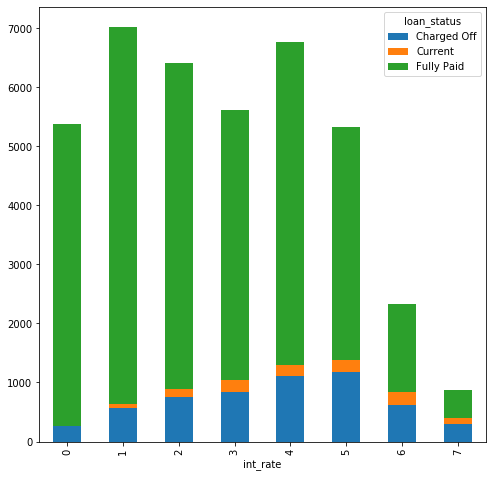

In [68]:
rate_status.plot(kind='bar', stacked=True, legend=True, figsize=(8,8))
plt.show()

we can see in this plot that people with higher interest rate tend to charge off, 17.5% and higher interest rates are more prominent

In [69]:
df['annual_inc']=df['annual_inc'].astype('int64')

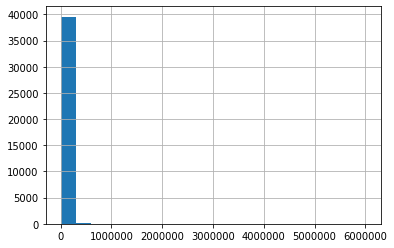

In [70]:
df['annual_inc'].hist(bins=20)

In [71]:
bins=[0,20000,30000,40000, 50000,70000,90000,110000,250000,6000000]
labels=[0,1,2,3,4,5,6,7,8]

In [72]:
df['annual_inc']=pd.cut(df['annual_inc'], bins=bins, labels=labels)
df['annual_inc']=df['annual_inc'].astype('category')

In [73]:
income_status=pd.crosstab(df['annual_inc'], df['loan_status'])
income_status

loan_status,Charged Off,Current,Fully Paid
annual_inc,,,
0,237,9,943
1,602,64,2769
2,912,106,4235
3,862,176,4830
4,1426,294,8241
5,770,221,5265
6,354,110,2881
7,433,151,3524
8,31,9,262


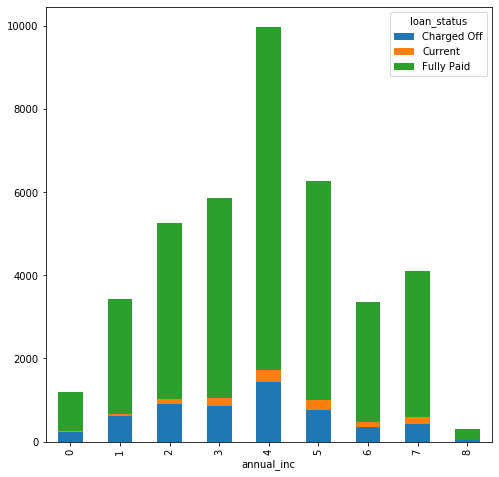

In [74]:
income_status.plot(kind='bar', stacked=True, legend=True, figsize=(8,8))

plt.show()

lets convert all other numerical columns into categorical columns

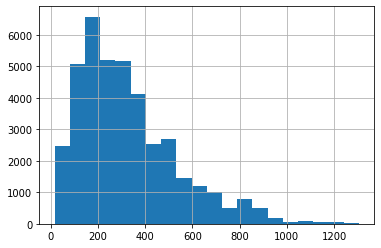

In [75]:
df['installment'].hist(bins=20)

In [76]:
bins=[0,100,200,300,400,600,800,1500]
labels=[1,2,3,4,5,6,7]

In [77]:
df['installment']=pd.cut(df['installment'], bins=bins, labels=labels)


In [78]:
df['installment']=df['installment'].astype('category')

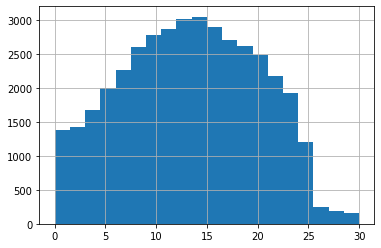

In [79]:
df['dti'].hist(bins=20)

In [80]:
bins=[0,5,10,15,20,25,30]
labels=[1, 2, 3, 4,5, 6]


In [81]:
df['dti']=pd.cut(df['dti'], bins=bins, labels=labels)

In [82]:
df['dti']=df['dti'].astype('category')

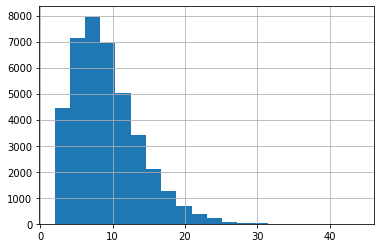

In [83]:
df['open_acc'].hist(bins=20)

In [84]:
bins=[0,5,7,10,15,45]
labels=[1, 2,3, 4, 5]

In [85]:
df['open_acc']=pd.cut(df['open_acc'], bins=bins, labels=labels)
df['open_acc']=df['open_acc'].astype('category')


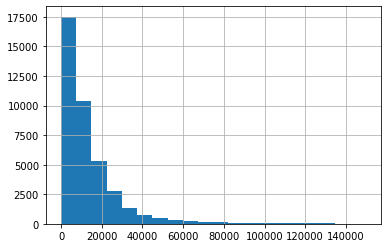

In [86]:
df['revol_bal'].hist(bins=20)

In [87]:
bins=[0,200,500,1000,5000,10000,15000,20000,40000,150000]
labels=[1,2,3,4,5,6,7,8,9]

In [88]:
df['revol_bal']=pd.cut(df['revol_bal'], bins=bins, labels=labels)
df['revol_bal']=df['revol_bal'].astype('category')

In [89]:
df['revol_bal'].value_counts()

5    8994
4    8958
6    6265
8    5659
7    3979
9    2142
3    1234
2     855
1     637
Name: revol_bal, dtype: int64

#### pre processing Data set for model fitting

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39717 entries, 2011-12-01 to 2007-06-01
Data columns (total 30 columns):
funded_amnt                39717 non-null category
term                       39717 non-null category
int_rate                   39717 non-null category
installment                39717 non-null category
grade                      39717 non-null category
emp_length                 39717 non-null category
home_ownership             39717 non-null category
annual_inc                 39717 non-null category
verification_status        39717 non-null category
loan_status                39717 non-null category
dti                        39534 non-null category
delinq_2yrs                39717 non-null category
earliest_cr_line           39717 non-null datetime64[ns]
inq_last_6mths             39717 non-null category
open_acc                   39717 non-null category
pub_rec                    39717 non-null category
revol_bal                  38723 non-null category
r

In [91]:
date_cols=[]
for col in df.select_dtypes('datetime64'):
    date_cols.append(col)

In [92]:
df=df.drop(date_cols, axis=1)   # for modelling we do not need the the datetime variables

In [93]:
df.reset_index(inplace=True, drop=True)  # since the 'issue_d' variable was in the index we'll reset index and drop that col

In [94]:
df.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,2,36 months,2,2,B,10+ years,RENT,1,Verified,Fully Paid,6,0,1,1,0,6,0.837,9,0.00,5863.155187,5000.00,863.16,0.00,0.00,0.00,171.62,0
1,2,60 months,5,1,C,< 1 year,RENT,1,Source Verified,Charged Off,1,0,5,1,0,4,0.094,4,0.00,1008.710000,456.46,435.17,0.00,117.08,1.11,119.66,0
2,2,36 months,5,1,C,10+ years,RENT,0,Not Verified,Fully Paid,2,0,2,1,0,4,0.985,10,0.00,3005.666844,2400.00,605.67,0.00,0.00,0.00,649.91,0
3,4,36 months,4,4,C,10+ years,RENT,3,Source Verified,Fully Paid,4,0,1,3,0,5,0.210,37,0.00,12231.890000,10000.00,2214.92,16.97,0.00,0.00,357.48,0
4,2,60 months,3,1,B,1 year,RENT,5,Source Verified,Current,4,0,0,4,0,8,0.539,38,524.06,3513.330000,2475.94,1037.39,0.00,0.00,0.00,67.79,0


In [95]:
cat_cols=[]
for col in df.select_dtypes('category'):
    cat_cols.append(col)

In [96]:
num_col=[]
for col in df.select_dtypes(('float64', 'int64')):
    num_col.append(col)

Lets label encode the categorical variables and scale the numerical variables for fitting models

In [97]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [98]:
for col in cat_cols:
    df[col]=le.fit_transform(df[col].astype('str'))

In [99]:
cat=df.loc[:,cat_cols]

In [100]:
cat.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,pub_rec_bankruptcies
0,1,0,2,1,1,1,4,1,2,2,5,0,1,0,0,5,0
1,1,1,5,0,2,10,4,1,1,0,0,0,5,0,0,3,0
2,1,0,5,0,2,1,4,0,0,2,1,0,2,0,0,3,0
3,3,0,4,3,2,1,4,3,1,2,3,0,1,2,0,4,0
4,1,1,3,0,1,0,4,5,1,1,3,0,0,3,0,7,0


In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
nums=df.loc[:,num_col]
numeric=MinMaxScaler().fit_transform(nums)
num=pd.DataFrame(numeric, columns=num_col)

In [103]:
num.head()

,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,0.837838,0.079545,0.000000,0.100116,0.142857,0.036631,0.000000,0.000000,0.000000,0.004752
1,0.094094,0.022727,0.000000,0.017224,0.013042,0.018468,0.000000,0.003952,0.000159,0.003313
2,0.985986,0.090909,0.000000,0.051323,0.068571,0.025704,0.000000,0.000000,0.000000,0.017995
3,0.210210,0.397727,0.000000,0.208865,0.285714,0.093997,0.094173,0.000000,0.000000,0.009898
4,0.539540,0.409091,0.083033,0.059992,0.070741,0.044025,0.000000,0.000000,0.000000,0.001877


In [104]:
data=pd.concat([cat,num],axis=1)

In [105]:
data.shape

(39717, 27)

lets check for corrrelation of different columns with the target variable in a graphical fromat

In [106]:
feature=data.drop('loan_status', axis=1)  # independet variables
x=feature

In [107]:
target=df['loan_status']       #target Variables
y=target

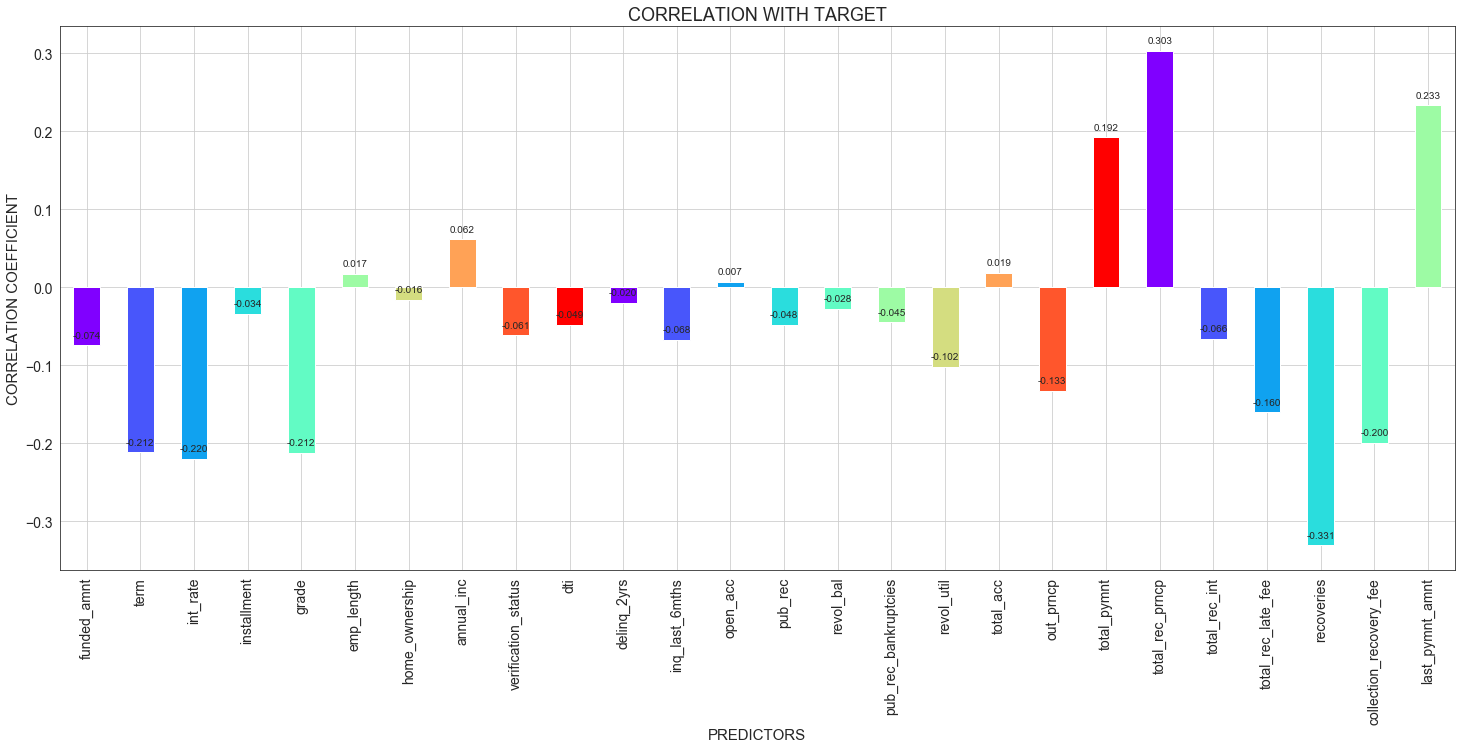

In [108]:
import matplotlib.cm as cmap
sns.set_style("white")
colors = cmap.rainbow(np.linspace(0, 1, num=10))
corr= feature.corrwith(target)
g= corr.plot.bar( figsize = (25,10), fontsize = 14,
        rot = 90, grid = True, color=colors)
for p in g.patches:
    g.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("CORRELATION WITH TARGET", fontsize= 18)
plt.xlabel("PREDICTORS", fontsize= 15)
plt.ylabel("CORRELATION COEFFICIENT", fontsize= 15)
plt.show()

in the above graph, we see variables term, interest_Rate, grade, total_payment, total_rec_prncp, recoveries, collection_recovery fees and last_paymnt_amnt are highly correlated variables.



there is  another method of visualising the correlation

In [109]:
from yellowbrick.target import FeatureCorrelation  #library for checking the the correaltion between target and independent variables 

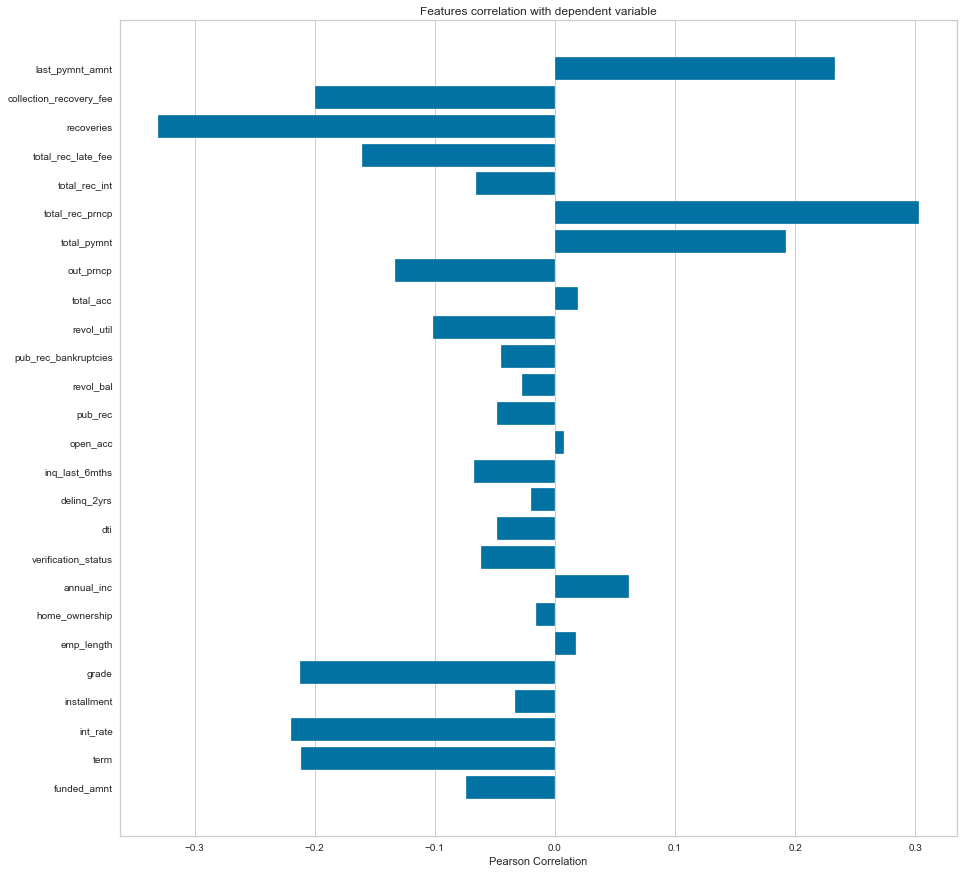

In [110]:
plt.figure(figsize=(15,15))
visualizer=FeatureCorrelation(labels=feature.columns)
visualizer.fit(feature,target)
visualizer.show()

In [111]:
corr_feature=['term', 'int_rate', 'grade','total_pymnt', 'total_rec_prncp', 'total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_amnt'] 

In [112]:
x_corr=data.loc[:,corr_feature] # gathering only the highly correlated variables together

In [113]:
x_corr.head()

,term,int_rate,grade,total_pymnt,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,0,2,1,0.100116,0.142857,0.000000,0.000000,0.000000,0.004752
1,1,5,2,0.017224,0.013042,0.000000,0.003952,0.000159,0.003313
2,0,5,2,0.051323,0.068571,0.000000,0.000000,0.000000,0.017995
3,0,4,2,0.208865,0.285714,0.094173,0.000000,0.000000,0.009898
4,1,3,1,0.059992,0.070741,0.000000,0.000000,0.000000,0.001877


##### Modelling

lets split the train and test 

In [114]:
from sklearn.model_selection import train_test_split

In [116]:
x_train, x_test, y_train, y_test=train_test_split(x_corr,y, test_size=0.2, random_state=1)

In [117]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape) 

(31773, 9)
(7944, 9)
(31773,)
(7944,)


Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression # import logistic regression for modelling

In [119]:
from sklearn.model_selection import GridSearchCV   #import GridSearchCV gto hyper parameter tuning

In [120]:
logreg=LogisticRegression()
logistic=logreg.fit(x_train, y_train)
ypred_log=logistic.predict(x_test)
logreg_score=round(logreg.score(x_train,y_train)*100,2)
print('Accuracy score of Logistic Regression model:', logreg_score)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy score of Logistic Regression model: 89.62


hyper tuning parameter

In [141]:
log_param={"C":[0.001,0.01,0.1], "penalty":["l1","l2"]}
log_cv=GridSearchCV(logreg, log_param,cv=5)
log_cv.fit(x_train, y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [142]:
log_cv.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [143]:
log_cv.best_score_

0.9105844585025021

KNN-classifier

In [124]:
from sklearn.neighbors import KNeighborsClassifier # import KNN classifier for modelling

In [125]:
k_model=KNeighborsClassifier(n_neighbors=5)
knn=k_model.fit(x_train,y_train)
ypred_knn=knn.predict(x_test)
knn_score=round(knn.score(x_train,y_train)*100,2)
print('Accuracy score of KNeighbors model:', knn_score)

Accuracy score of KNeighbors model: 95.69


fine tuning hyper parameter

In [126]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,25)}
knn_cv=GridSearchCV(knn, params, cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [127]:
knn_cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [128]:
knn_cv.best_score_

0.9480061687596387

Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier for modelling

In [130]:
DT=DecisionTreeClassifier()
dtree=DT.fit(x_train,y_train)
ypred_tree=dtree.predict(x_test)
dtree_score=round(dtree.score(x_train,y_train)*100,2)
print('Accuracy score of Decaion Tree model:', dtree_score)

Accuracy score of Decaion Tree model: 100.0


Fine tuning hyper parameter

In [131]:
tree_params={'criterion':['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7], 'min_samples_leaf':[9,7,5]}
dt_cv=GridSearchCV(estimator=DT, param_grid=tree_params, cv=5)
dt_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                

In [132]:
dt_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [133]:
dt_cv.best_score_

0.9514367544770718

Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier  #importing Randomforest classifier for modelling

In [135]:
forest=RandomForestClassifier(n_estimators=100, min_samples_leaf=3)
random=forest.fit(x_train, y_train)
ypred_forest=random.predict(x_test)
forest_score=round(random.score(x_train,y_train)*100,2)
print('Accuracy score of Random Forest model:', forest_score)

Accuracy score of Random Forest model: 99.04


Fine Tuning huperparameter:

In [136]:
rfc=RandomForestClassifier(oob_score=True)
param_grid = {
    'n_estimators': [100, 150, 200, 200, 250, 300],
    'max_depth': [5,3,None],
    'min_samples_leaf': [9,7,5]
}

In [137]:
rf_cv=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rf_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=True, random_state=None,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [138]:
rf_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
rf_cv.best_score_

0.9731847795297894

#### Balacing the Data set: 

 As we notice in the EDA thae target has severe class imbalance with 83% fully paid and 2.9% are currently paying thier loan. and 14.2% have charged-off, so lets undersample our majority class and try again fitting the model

In [157]:
data=data.sample(frac=1, random_state=4) #shuffling the data set

In [158]:
data.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,pub_rec_bankruptcies,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
18523,3,0,4,2,3,1,4,2,0,2,4,0,0,3,0,7,0,0.905906,0.250000,0.0,0.169368,0.228571,0.081431,0.0,0.000000,0.000000,0.007723
20415,1,0,2,0,1,2,4,3,1,2,1,0,0,0,0,4,0,0.835836,0.284091,0.0,0.059836,0.085714,0.021399,0.0,0.000000,0.000000,0.002821
33649,3,0,4,2,2,5,4,2,2,0,3,0,1,2,0,5,0,0.661662,0.170455,0.0,0.102327,0.122247,0.064343,0.0,0.006679,0.000321,0.008035
39686,2,0,1,2,1,0,4,4,0,2,1,0,0,1,0,3,0,0.693694,0.068182,0.0,0.126289,0.182857,0.042267,0.0,0.000000,0.000000,0.005720
21029,3,0,4,3,2,1,0,4,1,2,4,0,3,4,1,4,0,0.810811,0.420455,0.0,0.190518,0.262857,0.083069,0.0,0.000000,0.000000,0.058736


In [160]:
data.shape

(39717, 27)

In [161]:
charged_off=data.loc[data['loan_status']==0] #seggregating the charge off data saperate
charged_off.shape

(5627, 27)

In [164]:
current=data.loc[data['loan_status']==1] # seggregating the currently-paying seprate
current.shape

(1140, 27)

In [166]:
paid_full=data.loc[data['loan_status']==2].sample(n=6000, random_state=90) #seggregating the fully paid separately and undersampling
paid_full.shape

(6000, 27)

In [170]:
sampled_df=pd.concat([charged_off, current, paid_full], axis=0) #concating the three classes back together

In [173]:
sampled_df=sampled_df.sample(frac=1, random_state=9)
sampled_df.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,pub_rec_bankruptcies,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
5522,6,1,4,4,2,1,4,4,2,2,5,0,2,1,0,5,0,0.902903,0.181818,0.0,0.440545,0.571428,0.246139,0.0,0.000000,0.000000,0.339124
38009,4,0,5,4,3,3,0,7,2,2,2,0,2,3,0,7,0,0.850851,0.295455,0.0,0.255902,0.342857,0.126745,0.0,0.000000,0.000000,0.011822
37574,3,0,4,2,2,0,4,1,0,0,2,0,0,0,0,6,0,0.747748,0.193182,0.0,0.012863,0.014561,0.010340,0.0,0.000000,0.000000,0.006974
16904,4,1,6,2,4,2,4,1,2,0,3,0,0,1,0,4,0,0.853854,0.079545,0.0,0.082933,0.058095,0.099417,0.0,0.016233,0.000618,0.007153
16239,3,0,2,3,1,1,0,7,1,0,1,1,0,0,0,7,0,0.961962,0.125000,0.0,0.137298,0.114881,0.051054,0.0,0.095088,0.034682,0.009080


Target and Feature splitting , lets check for any changes in the correlation

In [176]:
sampled_x=sampled_df.drop('loan_status', axis=1)
sampled_y=sampled_df['loan_status']

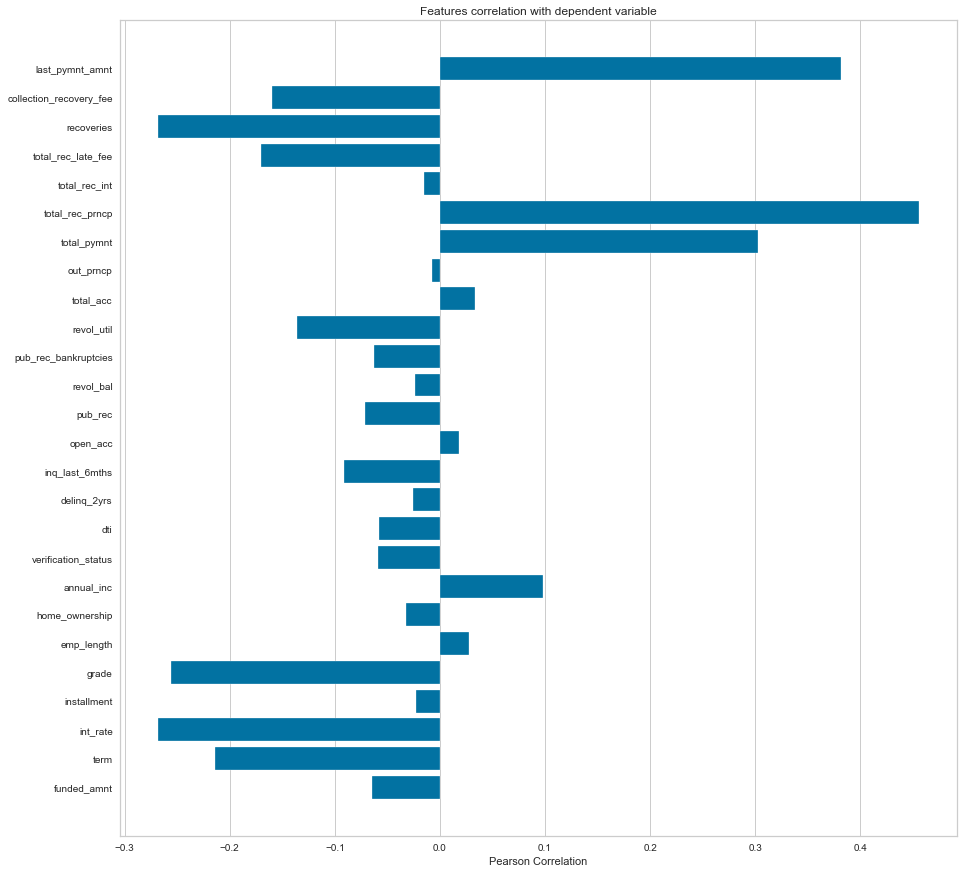

In [177]:
plt.figure(figsize=(15,15))
visualizer=FeatureCorrelation(labels=sampled_x.columns)
visualizer.fit(sampled_x,sampled_y)
visualizer.show()

We notice that there is not change in the correaltion coefficient

Lets do the train test split

In [178]:
sample_x_train, sample_x_test, sample_y_train, sample_y_test=train_test_split(sampled_x, sampled_y, test_size=0.2, random_state=1)

In [181]:
print(sample_x_train.shape)       # its always better to check the shapes first
print(sample_x_test.shape)
print(sample_y_train.shape)
print(sample_y_test.shape)


(10213, 26)
(2554, 26)
(10213,)
(2554,)


#### Model Fitting: 
Lest do the model fitting using hyper parameter tuning

Logistic Regression:

In [182]:
log_param={"C":[0.001,0.01,0.1], "penalty":["l1","l2"]}
log_cv=GridSearchCV(logreg, log_param,cv=5)
log_cv.fit(sample_x_train, sample_y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [184]:
log_cv.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [185]:
log_cv.best_score_

0.9438950357387643

KNN

In [186]:
params={'n_neighbors':np.arange(1,25)}
knn_cv=GridSearchCV(knn, params, cv=5)
knn_cv.fit(sample_x_train, sample_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [188]:
knn_cv.best_params_

{'n_neighbors': 21}

In [187]:
knn_cv.best_score_

0.5821012435131695

Decision Tree:

In [189]:
tree_params={'criterion':['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7], 'min_samples_leaf':[9,7,5]}
dt_cv=GridSearchCV(estimator=DT, param_grid=tree_params, cv=5)
dt_cv.fit(sample_x_train, sample_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                

In [190]:
dt_cv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}

In [191]:
dt_cv.best_score_

0.9811025164006658

Random Forest:

In [198]:
rfc=RandomForestClassifier(oob_score=True)
param_grid = {
    'n_estimators': [100, 150, 200, 200, 250, 300],
    'max_depth': [5,3,1],
    'min_samples_leaf': [9,7,5]
}

In [199]:
rf_cv=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rf_cv.fit(sample_x_train,sample_y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=True, random_state=None,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={

In [200]:
rf_cv.best_params_

{'max_depth': 5, 'min_samples_leaf': 7, 'n_estimators': 100}

In [201]:
rf_cv.best_score_

0.9637716635660433

#### Conclusion:

form the grid search we the best parameter. Lets fit and predict using Random Forest Classifier

In [206]:
random_forest=RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=7, oob_score=True)
forest=random_forest.fit(sample_x_train, sample_y_train)
y_predict=forest.predict(sample_x_test)

In [207]:
accuracy=round(random_forest.score(sample_x_train, sample_y_train)*100,2)
print('Accuracy of random forest is:', accuracy)      # accuracy

Accuracy of random forest is: 95.84


In [209]:
oob_score=round((forest.oob_score_)*100,4)
print(' out of bag accuracy score is', oob_score)

 out of bag accuracy score is 95.6722


Lets double check the accuracy using k-fold cross validation

In [211]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [213]:
scores=cross_val_score(random_forest, sample_x_train, sample_y_train, cv=10, scoring='accuracy')
print('scores:', scores)
print('Mean_scores:', scores.mean())
print('standar deviation:', scores.std())

scores: [0.95898438 0.96376102 0.96963761 0.95886386 0.9510284  0.96474045
 0.96376102 0.96278159 0.95886386 0.95494613]
Mean_scores: 0.9607368312316357
standar deviation: 0.005055672110998451


We can see that mean score is 96.07 with a standart deviation of 0.005

In [217]:
importances=np.round(random_forest.feature_importances_,3)  # calculate the importances of the feature

In [219]:
result=pd.DataFrame({'Feature':sample_x_train.columns, 'Importance': importances})
result.sort_values(by='Importance', ascending=False)    #result in a tabulare format is more presentable

,Feature,Importance
23,recoveries,0.292
24,collection_recovery_fee,0.176
18,out_prncp,0.171
25,last_pymnt_amnt,0.119
20,total_rec_prncp,0.089
19,total_pymnt,0.045
1,term,0.030
21,total_rec_int,0.025
0,funded_amnt,0.017
3,installment,0.013


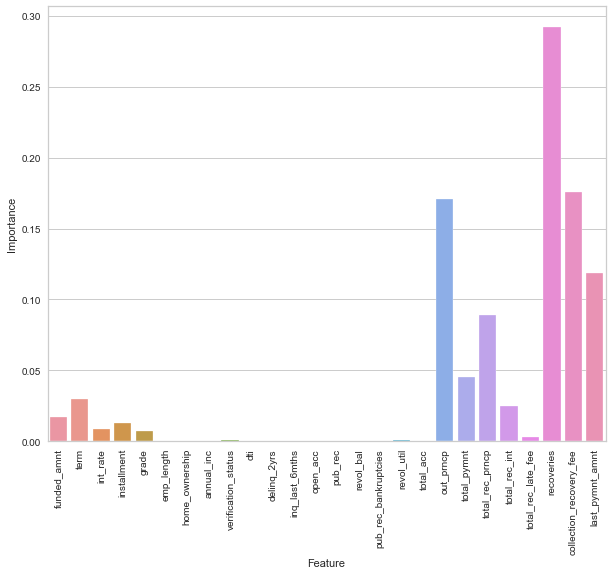

In [226]:
plt.figure(figsize=(10,8))
plot=sns.barplot(x='Feature', y='Importance', data=result)
plot.set_xticklabels(result.Feature, rotation=90)
plt.show()

Lets check the classification report on yPrediction and sample_y_test

In [229]:
from sklearn.metrics import classification_report, confusion_matrix

In [228]:
classification=classification_report(sample_y_test, y_predict)
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1176
           1       1.00      0.99      1.00       199
           2       0.90      1.00      0.95      1179

    accuracy                           0.95      2554
   macro avg       0.97      0.96      0.96      2554
weighted avg       0.95      0.95      0.95      2554



In [231]:
matrix=confusion_matrix(sample_y_test, y_predict)
print (matrix)

[[1042    0  134]
 [   0  198    1]
 [   1    0 1178]]


lets graphically present the confusion matrix for better understanding

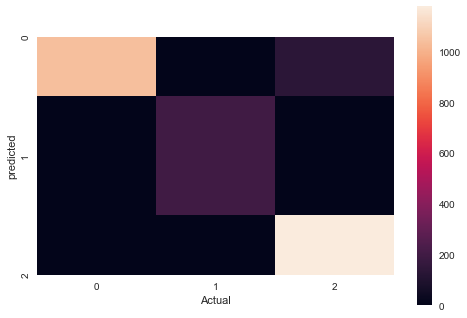

In [233]:
sns.heatmap(matrix, square=True)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()